In [79]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt
%matplotlib inline
import xgboost as xgb

# New section

In [80]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CreditScoring.csv')
df.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [81]:
df.columns = df.columns.str.lower()
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [82]:
status_values = {
    1: 'ok',
    2: 'default',
    0: 'unk'
}
df.status = df.status.map(status_values)
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,1,60,30,2,1,3,73,129,0,0,800,846
1,ok,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,default,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,ok,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,ok,0,1,36,26,1,1,1,46,107,0,0,310,910


In [83]:
home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other'
}
df.home = df.home.map(home_values)

marital_values = {
    1: 'single',
    2: 'married',
    3: 'widom',
    4: 'separated',
    5: 'divorced',
    6: 'unk'
}
df.marital = df.marital.map(marital_values)

records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}
df.records = df.records.map(records_values)

job_values = {
    1: 'fixed',
    2: 'parttime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}
df.job = df.job.map(job_values)

In [84]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widom,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910


In [85]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


In [86]:
for value in ['income', 'assets', 'debt']:
    df[value] = df[value].replace(to_replace=99999999.0, value=np.nan)

In [87]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4421.0,4408.0,4437.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,131.0,5403.0,343.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,86.0,11573.0,1246.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3000.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,165.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,959.0,300000.0,30000.0,5000.0,11140.0


In [88]:
df.status.value_counts()

,count
status,
ok,3200
default,1254
unk,1


In [89]:
df = df[df.status != 'unk']

In [90]:
df.status.value_counts()

,count
status,
ok,3200
default,1254


dataset preparation¶

In [91]:
from sklearn.model_selection import train_test_split

In [92]:
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=1)

In [93]:
len(df_train), len(df_val), len(df_test)

(2672, 891, 891)

In [94]:
y_train = (df_train.status == 'default').values
y_val = (df_val.status == 'default').values

In [95]:
del df_train['status']
del df_val['status']

In [98]:
df_train = df_train.fillna(0)
df_val = df_val.fillna(0)

In [100]:
dict_train = df_train.to_dict(orient='records')
dict_val = df_val.to_dict(orient='records')

In [101]:
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(dict_train)
X_val = dv.transform(dict_val)

## Decision trees

In [103]:
from sklearn.tree import DecisionTreeClassifier

In [105]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [107]:
from sklearn.metrics import roc_auc_score

In [109]:
y_pred = dt.predict_proba(X_train)[:,1]
roc_auc_score(y_train, y_pred)

1.0

In [110]:
y_pred = dt.predict_proba(X_val)[:,1]
roc_auc_score(y_val, y_pred)

0.6390622045755341

In [112]:
dt = dt = DecisionTreeClassifier(max_depth=2)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [114]:
from sklearn.tree import export_text
tree_text = export_text(dt, feature_names=dv.feature_names_)
print(tree_text)

|--- income <= 89.50
|   |--- seniority <= 2.50
|   |   |--- class: True
|   |--- seniority >  2.50
|   |   |--- class: False
|--- income >  89.50
|   |--- records=yes <= 0.50
|   |   |--- class: False
|   |--- records=yes >  0.50
|   |   |--- class: False



In [116]:
y_pred = dt.predict_proba(X_train)[:,1]
auc = roc_auc_score(y_train, y_pred)
print('train auc', auc)

train auc 0.7295775678019526


In [118]:
y_pred = dt.predict_proba(X_val)[:,1]
auc = roc_auc_score(y_val, y_pred)
print('validation auc', auc)

validation auc 0.7108180500409655


In [120]:
for depth in [1,2,3,4,5,6,10,15,20, None]:
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(X_train, y_train)
    y_pred = dt.predict_proba(X_val)[:,1]
    auc = roc_auc_score(y_val, y_pred)
    print('%4s -> %.3f ' % (depth, auc))

   1 -> 0.616 
   2 -> 0.711 
   3 -> 0.752 
   4 -> 0.773 
   5 -> 0.765 
   6 -> 0.731 
  10 -> 0.678 
  15 -> 0.636 
  20 -> 0.640 
None -> 0.649 


In [122]:
for m in [3,4,5,6]:
    print('depth: %s' % m)

    for s in [1, 5, 10, 15, 20, 50, 100, 200]:
        dt = DecisionTreeClassifier(max_depth=m, min_samples_leaf=s)
        dt.fit(X_train, y_train)
        y_pred = dt.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val, y_pred)
        print('%s -> %.3f ' % (s, auc))
    print()

depth: 3
1 -> 0.752 
5 -> 0.752 
10 -> 0.752 
15 -> 0.752 
20 -> 0.752 
50 -> 0.752 
100 -> 0.751 
200 -> 0.748 

depth: 4
1 -> 0.773 
5 -> 0.777 
10 -> 0.778 
15 -> 0.777 
20 -> 0.777 
50 -> 0.772 
100 -> 0.777 
200 -> 0.762 

depth: 5
1 -> 0.765 
5 -> 0.774 
10 -> 0.776 
15 -> 0.780 
20 -> 0.779 
50 -> 0.780 
100 -> 0.774 
200 -> 0.762 

depth: 6
1 -> 0.730 
5 -> 0.746 
10 -> 0.759 
15 -> 0.783 
20 -> 0.782 
50 -> 0.781 
100 -> 0.782 
200 -> 0.762 



In [125]:
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred_dt)

0.7830024579315561

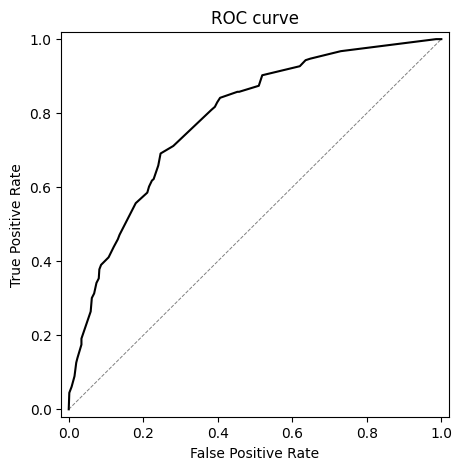

In [127]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_val, y_pred_dt)

plt.figure(figsize=(5, 5))

plt.plot(fpr, tpr, color='black')
plt.plot([0, 1], [0, 1], color='black', lw=0.7, linestyle='dashed', alpha=0.5)

plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC curve')

plt.show()

## Random forest¶

In [129]:
from sklearn.ensemble import RandomForestClassifier

In [131]:
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train, y_train)
y_pred = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.785510808596458

In [133]:
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train, y_train)
y_pred = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.7690426671708578

In [135]:
aucs = []

for i in range(100):
    rf = RandomForestClassifier(n_estimators=10)
    rf.fit(X_train, y_train)
    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    aucs.append(auc)

auc_mean = np.mean(aucs)
auc_std = np.std(aucs)

print('%.3f +- %.3f' % (auc_mean, auc_std))
print('%.3f -- %.3f' % (auc_mean -  auc_std, auc_mean + auc_std))

0.779 +- 0.009
0.769 -- 0.788


In [137]:
rf = RandomForestClassifier(n_estimators=10, random_state=3)
rf.fit(X_train, y_train)
y_pred = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.7746612466124662

In [138]:
aucs = []

for i in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=i, random_state=3)
    rf.fit(X_train, y_train)
    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    print('%s -> %.3f' % (i, auc))
    aucs.append(auc)

10 -> 0.775
20 -> 0.796
30 -> 0.804
40 -> 0.805
50 -> 0.807
60 -> 0.808
70 -> 0.810
80 -> 0.812
90 -> 0.812
100 -> 0.813
110 -> 0.813
120 -> 0.813
130 -> 0.816
140 -> 0.816
150 -> 0.817
160 -> 0.818
170 -> 0.818
180 -> 0.818
190 -> 0.818
200 -> 0.818


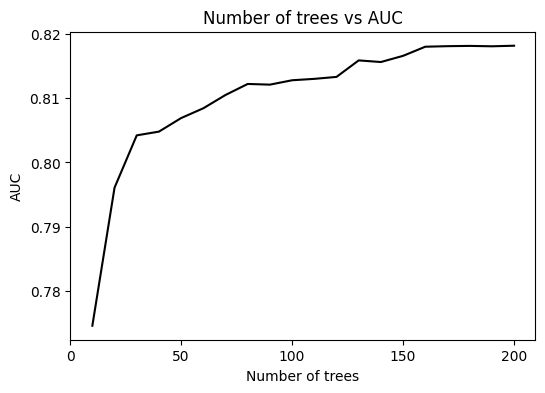

In [140]:
plt.figure(figsize=(6, 4))

plt.plot(range(10, 201, 10), aucs, color='black')
plt.xticks(range(0, 201, 50))

plt.title('Number of trees vs AUC')
plt.xlabel('Number of trees')
plt.ylabel('AUC')

# plt.savefig('ch06-figures/06_random_forest_n_estimators.svg')

plt.show()

In [142]:
all_aucs = {}

for depth in [5, 10, 20]:
    print('depth: %s' % depth)
    aucs = []

    for i in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=i, max_depth=depth, random_state=1)
        rf.fit(X_train, y_train)
        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        print('%s -> %.3f' % (i, auc))
        aucs.append(auc)

    all_aucs[depth] = aucs
    print()

depth: 5
10 -> 0.802
20 -> 0.805
30 -> 0.809
40 -> 0.810
50 -> 0.813
60 -> 0.814
70 -> 0.814
80 -> 0.815
90 -> 0.815
100 -> 0.814
110 -> 0.815
120 -> 0.815
130 -> 0.815
140 -> 0.816
150 -> 0.815
160 -> 0.816
170 -> 0.817
180 -> 0.817
190 -> 0.817
200 -> 0.818

depth: 10
10 -> 0.791
20 -> 0.801
30 -> 0.804
40 -> 0.812
50 -> 0.815
60 -> 0.816
70 -> 0.819
80 -> 0.818
90 -> 0.818
100 -> 0.819
110 -> 0.818
120 -> 0.817
130 -> 0.817
140 -> 0.817
150 -> 0.817
160 -> 0.817
170 -> 0.817
180 -> 0.817
190 -> 0.817
200 -> 0.817

depth: 20
10 -> 0.764
20 -> 0.786
30 -> 0.796
40 -> 0.800
50 -> 0.805
60 -> 0.807
70 -> 0.809
80 -> 0.813
90 -> 0.813
100 -> 0.815
110 -> 0.815
120 -> 0.815
130 -> 0.817
140 -> 0.817
150 -> 0.816
160 -> 0.816
170 -> 0.816
180 -> 0.817
190 -> 0.818
200 -> 0.818



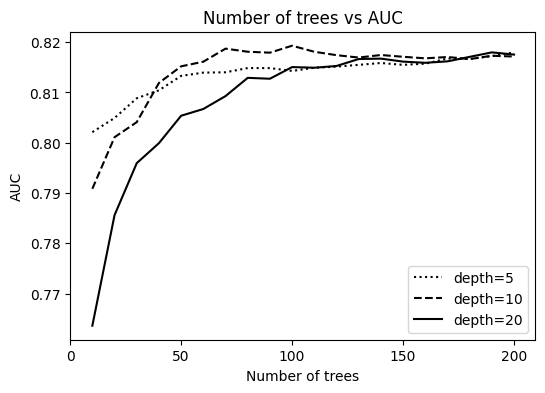

In [144]:
plt.figure(figsize=(6, 4))

num_trees = list(range(10, 201, 10))

plt.plot(num_trees, all_aucs[5], label='depth=5', color='black', linestyle='dotted')
plt.plot(num_trees, all_aucs[10], label='depth=10', color='black', linestyle='dashed')
plt.plot(num_trees, all_aucs[20], label='depth=20', color='black', linestyle='solid')

plt.xticks(range(0, 201, 50))
plt.legend()

plt.title('Number of trees vs AUC')
plt.xlabel('Number of trees')
plt.ylabel('AUC')

# plt.savefig('ch06-figures/06_random_forest_n_estimators_depth.svg')

plt.show()

In [145]:
all_aucs = {}

for m in [3, 5, 10]:
    print('min_samples_leaf: %s' % m)
    aucs = []

    for i in range(10, 201, 20):
        rf = RandomForestClassifier(n_estimators=i, max_depth=10, min_samples_leaf=m, random_state=1)
        rf.fit(X_train, y_train)
        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        print('%s -> %.3f' % (i, auc))
        aucs.append(auc)

    all_aucs[m] = aucs
    print()

min_samples_leaf: 3
10 -> 0.799
30 -> 0.808
50 -> 0.813
70 -> 0.818
90 -> 0.819
110 -> 0.818
130 -> 0.819
150 -> 0.821
170 -> 0.821
190 -> 0.821

min_samples_leaf: 5
10 -> 0.815
30 -> 0.821
50 -> 0.824
70 -> 0.825
90 -> 0.825
110 -> 0.825
130 -> 0.824
150 -> 0.825
170 -> 0.825
190 -> 0.825

min_samples_leaf: 10
10 -> 0.810
30 -> 0.819
50 -> 0.822
70 -> 0.823
90 -> 0.824
110 -> 0.824
130 -> 0.823
150 -> 0.823
170 -> 0.824
190 -> 0.824



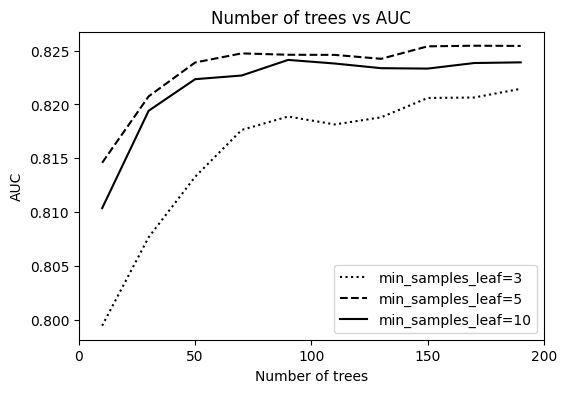

In [146]:
plt.figure(figsize=(6, 4))

num_trees = list(range(10, 201, 20))

plt.plot(num_trees, all_aucs[3], label='min_samples_leaf=3', color='black', linestyle='dotted')
plt.plot(num_trees, all_aucs[5], label='min_samples_leaf=5', color='black', linestyle='dashed')
plt.plot(num_trees, all_aucs[10], label='min_samples_leaf=10', color='black', linestyle='solid')

plt.xticks(range(0, 201, 50))
plt.legend()

plt.title('Number of trees vs AUC')
plt.xlabel('Number of trees')
plt.ylabel('AUC')

# plt.savefig('ch06-figures/06_random_forest_n_estimators_sample_leaf.svg')

plt.show()

In [147]:
rf = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_leaf=5, random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=200,
                       random_state=1)

In [148]:
y_pred_rf = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred_rf)

0.8254931619083632

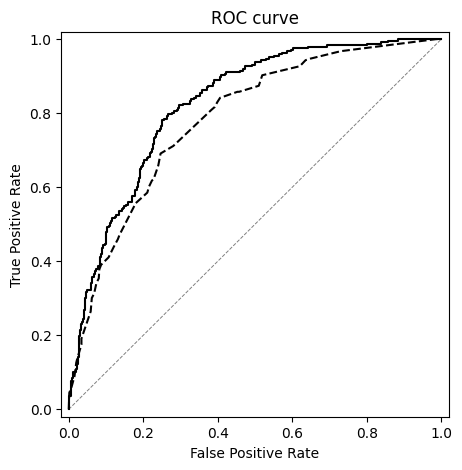

In [149]:
plt.figure(figsize=(5, 5))

fpr, tpr, _ = roc_curve(y_val, y_pred_rf)
plt.plot(fpr, tpr, color='black')

fpr, tpr, _ = roc_curve(y_val, y_pred_dt)
plt.plot(fpr, tpr, color='black', linestyle='dashed')

plt.plot([0, 1], [0, 1], color='black', lw=0.7, linestyle='dashed', alpha=0.5)

plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC curve')

plt.show()

## XGBoost

In [150]:
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=dv.feature_names_)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=dv.feature_names_)

In [151]:
xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'nthread': 8,
    'seed': 1
}

In [152]:
model = xgb.train(xgb_params, dtrain, num_boost_round=10)

In [153]:
y_pred = model.predict(dval)
y_pred[:10]

array([0.51866484, 0.04704909, 0.2669204 , 0.06957547, 0.07869123,
       0.51431537, 0.6196083 , 0.28386667, 0.9193923 , 0.30175865],
      dtype=float32)

In [154]:
roc_auc_score(y_val, y_pred)

0.8060187811180437

In [156]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [157]:
xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1
}

In [158]:
model = xgb.train(xgb_params, dtrain,
                  num_boost_round=100,
                  evals=watchlist, verbose_eval=10)

[0]	train-auc:0.86646	val-auc:0.77162
[10]	train-auc:0.95528	val-auc:0.80835
[20]	train-auc:0.97566	val-auc:0.81260
[30]	train-auc:0.98698	val-auc:0.81301
[40]	train-auc:0.99395	val-auc:0.81349
[50]	train-auc:0.99714	val-auc:0.81145
[60]	train-auc:0.99847	val-auc:0.80719
[70]	train-auc:0.99944	val-auc:0.80870
[80]	train-auc:0.99974	val-auc:0.80830
[90]	train-auc:0.99995	val-auc:0.80878
[99]	train-auc:0.99998	val-auc:0.80868


In [160]:
%%capture output

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=100,
                  evals=watchlist, verbose_eval=5)

In [161]:
def parse_xgb_output(output):
    tree = []
    aucs_train = []
    aucs_val = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        tree.append(it)
        aucs_train.append(train)
        aucs_val.append(val)

    return tree, aucs_train, aucs_val

In [162]:
tree, aucs_train, aucs_val = parse_xgb_output(output)

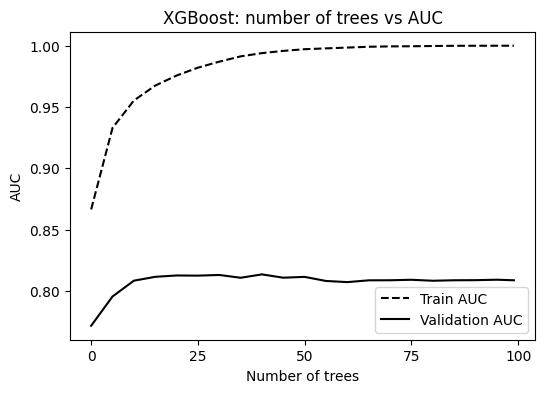

In [163]:
plt.figure(figsize=(6, 4))

plt.plot(tree, aucs_train, color='black', linestyle='dashed', label='Train AUC')
plt.plot(tree, aucs_val, color='black', linestyle='solid', label='Validation AUC')
plt.xticks(range(0, 101, 25))

plt.legend()

plt.title('XGBoost: number of trees vs AUC')
plt.xlabel('Number of trees')
plt.ylabel('AUC')

# plt.savefig('ch06-figures/06_xgb_default.svg')

plt.show()

##Parameter tuning: eta



### First, we try to set eta to 0.1

In [174]:
%%capture output

xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=500, verbose_eval=10,
                  evals=watchlist)

In [175]:
tree, _, aucs_val_eta_03 = parse_xgb_output(output)
print(max(aucs_val_eta_03))
print(max(zip(aucs_val_eta_03, tree)))

0.81349
(0.81349, 40)


In [176]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=500, verbose_eval=10,
                  evals=watchlist)

In [177]:
tree, _, aucs_val_eta_01 = parse_xgb_output(output)
print(max(aucs_val_eta_01))
print(max(zip(aucs_val_eta_01, tree)))

0.82379
(0.82379, 40)


In [166]:
%%capture output

xgb_params = {
    'eta': 0.05,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=500, verbose_eval=10,
                  evals=watchlist)

In [168]:
tree, _, aucs_val_eta_005 = parse_xgb_output(output)
print(max(aucs_val_eta_005))
print(max(zip(aucs_val_eta_005, tree)))

0.82143
(0.82143, 90)


In [169]:
%%capture output

xgb_params = {
    'eta': 0.01,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=500, verbose_eval=10,
                  evals=watchlist)

In [170]:
tree, _, aucs_val_eta_001 = parse_xgb_output(output)
print(max(aucs_val_eta_001))
print(max(zip(aucs_val_eta_001, tree)))

0.82388
(0.82388, 470)


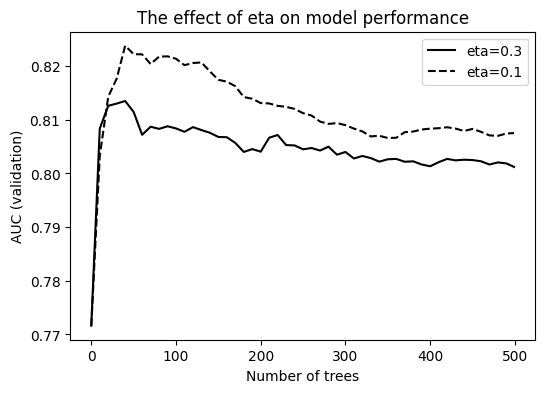

In [178]:
plt.figure(figsize=(6, 4))

plt.plot(tree, aucs_val_eta_03, color='black', linestyle='solid', label='eta=0.3')
plt.plot(tree, aucs_val_eta_01, color='black', linestyle='dashed', label='eta=0.1')
# plt.plot(tree, aucs_val_eta_005, color='grey', linestyle='solid', label='eta=0.05')
# plt.plot(tree, aucs_val_eta_001, color='grey', linestyle='dashed', label='eta=0.01')

plt.xticks(range(0, 501, 100))

plt.legend()

plt.title('The effect of eta on model performance')
plt.xlabel('Number of trees')
plt.ylabel('AUC (validation)')

# plt.savefig('ch06-figures/06_xgb_eta.svg')

plt.show()

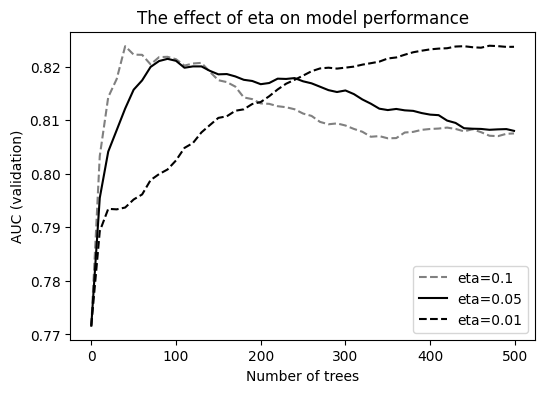

In [179]:
plt.figure(figsize=(6, 4))

plt.plot(tree, aucs_val_eta_01, color='grey', linestyle='dashed', label='eta=0.1')
plt.plot(tree, aucs_val_eta_005, color='black', linestyle='solid', label='eta=0.05')
plt.plot(tree, aucs_val_eta_001, color='black', linestyle='dashed', label='eta=0.01')

plt.xticks(range(0, 501, 100))

plt.legend()

plt.title('The effect of eta on model performance')
plt.xlabel('Number of trees')
plt.ylabel('AUC (validation)')

# plt.savefig('ch06-figures/06_xgb_eta_2.svg')

plt.show()

### Parameter tuning: max_depth

In [180]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=500, verbose_eval=10,
                  evals=watchlist)

In [181]:
tree, _, aucs_val_depth3 = parse_xgb_output(output)
print(max(aucs_val_depth3))
print(max(zip(aucs_val_depth3, tree)))

0.83367
(0.83367, 100)


In [182]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 10,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=500, verbose_eval=10,
                  evals=watchlist)

In [183]:
tree, _, aucs_val_depth10 = parse_xgb_output(output)
print(max(aucs_val))
print(max(zip(aucs_val_depth10, tree)))

0.81349
(0.80972, 120)


In [184]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 4,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=500, verbose_eval=10,
                  evals=watchlist)

In [185]:
tree, _, aucs_val_depth4 = parse_xgb_output(output)
print(max(aucs_val_depth4))
print(max(zip(aucs_val_depth4, tree)))

0.82615
(0.82615, 80)


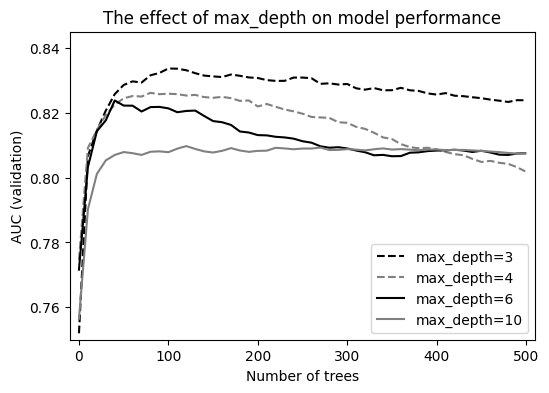

In [186]:
plt.figure(figsize=(6, 4))

plt.plot(tree, aucs_val_depth3, color='black', linestyle='dashed', label='max_depth=3')
plt.plot(tree, aucs_val_depth4, color='grey', linestyle='dashed', label='max_depth=4')
plt.plot(tree, aucs_val_eta_01, color='black', linestyle='solid', label='max_depth=6')
plt.plot(tree, aucs_val_depth10, color='grey', linestyle='solid', label='max_depth=10')

plt.ylim(0.75, 0.845)
plt.xlim(-10, 510)
plt.xticks(range(0, 501, 100))

plt.legend()

plt.title('The effect of max_depth on model performance')
plt.xlabel('Number of trees')
plt.ylabel('AUC (validation)')

# plt.savefig('ch06-figures/06_xgb_depth.svg')

plt.show()

### Tune "min_child_weight"

In [187]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=500, verbose_eval=10,
                  evals=watchlist)

In [188]:
tree, _, aucs_val_mcw1 = parse_xgb_output(output)
print(max(aucs_val_mcw1))
print(max(zip(aucs_val_mcw1, tree)))

0.83367
(0.83367, 100)


In [189]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 10,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=500, verbose_eval=10,
                  evals=watchlist)

In [190]:
tree, _, aucs_val_mcw10 = parse_xgb_output(output)
print(max(aucs_val_mcw10))
print(max(zip(aucs_val_mcw10, tree)))

0.83664
(0.83664, 150)


In [191]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 30,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=500, verbose_eval=10,
                  evals=watchlist)

In [193]:
tree, _, aucs_val_mcw30 = parse_xgb_output(output)
print(max(aucs_val_mcw30))
print(max(zip(aucs_val_mcw30, tree)))

0.83619
(0.83619, 120)


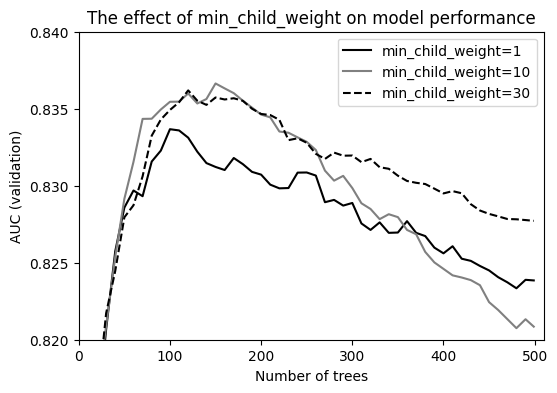

In [194]:
plt.figure(figsize=(6, 4))

plt.plot(tree, aucs_val_mcw1, color='black', linestyle='solid', label='min_child_weight=1')
plt.plot(tree, aucs_val_mcw10, color='grey', linestyle='solid', label='min_child_weight=10')
plt.plot(tree, aucs_val_mcw30, color='black', linestyle='dashed', label='min_child_weight=30')

plt.ylim(0.82, 0.84)
plt.xlim(0, 510)
plt.xticks(range(0, 501, 100))
plt.yticks(np.linspace(0.82, 0.84, 5))

plt.legend()

plt.title('The effect of min_child_weight on model performance')
plt.xlabel('Number of trees')
plt.ylabel('AUC (validation)')

# plt.savefig('ch06-figures/06_xgb_mcw.svg')

plt.show()

## Checking the best number of trees

In [195]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=500, verbose_eval=10,
                  evals=watchlist)

In [196]:
print(output)

[0]	train-auc:0.77697	val-auc:0.75199
[10]	train-auc:0.84956	val-auc:0.80665
[20]	train-auc:0.87027	val-auc:0.81448
[30]	train-auc:0.88167	val-auc:0.82067
[40]	train-auc:0.89013	val-auc:0.82575
[50]	train-auc:0.89712	val-auc:0.82858
[60]	train-auc:0.90229	val-auc:0.82969
[70]	train-auc:0.90612	val-auc:0.82932
[80]	train-auc:0.90934	val-auc:0.83157
[90]	train-auc:0.91189	val-auc:0.83228
[100]	train-auc:0.91475	val-auc:0.83367
[110]	train-auc:0.91778	val-auc:0.83359
[120]	train-auc:0.92071	val-auc:0.83312
[130]	train-auc:0.92340	val-auc:0.83221
[140]	train-auc:0.92600	val-auc:0.83147
[150]	train-auc:0.92822	val-auc:0.83122
[160]	train-auc:0.92966	val-auc:0.83102
[170]	train-auc:0.93200	val-auc:0.83180
[180]	train-auc:0.93366	val-auc:0.83140
[190]	train-auc:0.93532	val-auc:0.83090
[200]	train-auc:0.93680	val-auc:0.83072
[210]	train-auc:0.93829	val-auc:0.83007
[220]	train-auc:0.93973	val-auc:0.82983
[230]	train-auc:0.94157	val-auc:0.82985
[240]	train-auc:0.94360	val-auc:0.83085
[250]	train

In [197]:
tree, _, aucs_val = parse_xgb_output(output)
print(max(aucs_val))

0.83367


In [198]:
max(zip(aucs_val, tree))

(0.83367, 100)

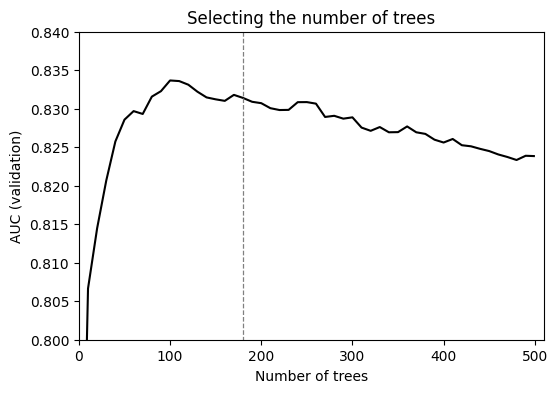

In [199]:
plt.figure(figsize=(6, 4))

plt.plot(tree, aucs_val, color='black', linestyle='solid')


plt.ylim(0.80, 0.84)
plt.xlim(0, 510)
plt.xticks(range(0, 501, 100))
plt.yticks(np.linspace(0.80, 0.84, 9))


plt.vlines(180, 0, 1, color='grey', linestyle='dashed', linewidth=0.9)

plt.title('Selecting the number of trees')
plt.xlabel('Number of trees')
plt.ylabel('AUC (validation)')

# plt.savefig('ch06-figures/06_xgb_number_trees.svg')

plt.show()

In [200]:
xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=180, verbose_eval=10,
                  evals=watchlist)

[0]	train-auc:0.77697	val-auc:0.75199
[10]	train-auc:0.84956	val-auc:0.80665
[20]	train-auc:0.87027	val-auc:0.81448
[30]	train-auc:0.88167	val-auc:0.82067
[40]	train-auc:0.89013	val-auc:0.82575
[50]	train-auc:0.89712	val-auc:0.82858
[60]	train-auc:0.90229	val-auc:0.82969
[70]	train-auc:0.90612	val-auc:0.82932
[80]	train-auc:0.90934	val-auc:0.83157
[90]	train-auc:0.91189	val-auc:0.83228
[100]	train-auc:0.91475	val-auc:0.83367
[110]	train-auc:0.91778	val-auc:0.83359
[120]	train-auc:0.92071	val-auc:0.83312
[130]	train-auc:0.92340	val-auc:0.83221
[140]	train-auc:0.92600	val-auc:0.83147
[150]	train-auc:0.92822	val-auc:0.83122
[160]	train-auc:0.92966	val-auc:0.83102
[170]	train-auc:0.93200	val-auc:0.83180
[179]	train-auc:0.93354	val-auc:0.83165


In [201]:
y_pred_xgb = model.predict(dval)

In [202]:
roc_auc_score(y_val, y_pred_xgb)

0.8316505955757232

In [203]:
print(roc_auc_score(y_val, y_pred_dt))
print(roc_auc_score(y_val, y_pred_rf))
print(roc_auc_score(y_val, y_pred_xgb))

0.7830024579315561
0.8254931619083632
0.8316505955757232


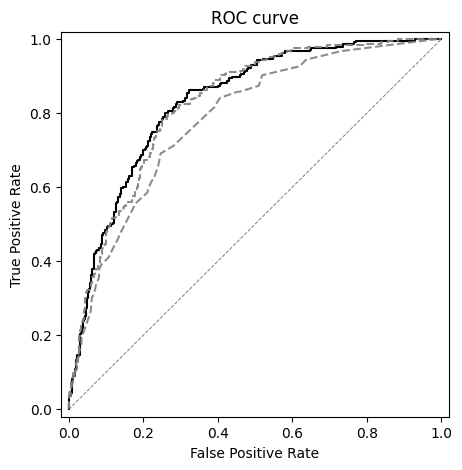

In [204]:
plt.figure(figsize=(5, 5))

fpr, tpr, _ = roc_curve(y_val, y_pred_xgb)
plt.plot(fpr, tpr, color='black')

fpr, tpr, _ = roc_curve(y_val, y_pred_rf)
plt.plot(fpr, tpr, color='grey', linestyle='dashed', alpha=0.9)

fpr, tpr, _ = roc_curve(y_val, y_pred_dt)
plt.plot(fpr, tpr, color='grey', linestyle='dashed', alpha=0.9)

plt.plot([0, 1], [0, 1], color='black', lw=0.7, linestyle='dashed', alpha=0.5)

plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC curve')

plt.show()

## Final test

In [205]:
y_train_full = (df_train_full.status == 'default').values
y_test = (df_test.status == 'default').values

del df_train_full['status']
del df_test['status']

In [206]:
dict_train_full = df_train_full.fillna(0).to_dict(orient='records')
dict_test = df_test.fillna(0).to_dict(orient='records')

dv = DictVectorizer(sparse=False)
X_train_full = dv.fit_transform(dict_train_full)
X_test = dv.transform(dict_test)

In [207]:
rf_final = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_leaf=5, random_state=1)
rf_final.fit(X_train_full, y_train_full)

y_pred_rf = rf.predict_proba(X_test)[:, 1]

In [208]:
dtrain_full = xgb.DMatrix(X_train_full, label=y_train_full, feature_names=dv.feature_names_)
dtest = xgb.DMatrix(X_test, label=y_test, feature_names=dv.feature_names_)

xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

num_trees = 160

xgb_final = xgb.train(xgb_params, dtrain_full, num_boost_round=num_trees)

In [209]:
y_pred_xgb = xgb_final.predict(dtest)

In [210]:
print(roc_auc_score(y_test, y_pred_rf))
print(roc_auc_score(y_test, y_pred_xgb))

0.814650892446296
0.8228790777651304


## Bonus: feature importance

In [211]:
dt.feature_importances_

array([0.00573597, 0.10644736, 0.09405871, 0.        , 0.00413025,
       0.        , 0.        , 0.        , 0.03251798, 0.        ,
       0.        , 0.        , 0.24789831, 0.02392356, 0.00739543,
       0.        , 0.07814005, 0.        , 0.        , 0.        ,
       0.002317  , 0.        , 0.        , 0.        , 0.01579281,
       0.17163001, 0.02091816, 0.17565456, 0.01343985])

In [212]:
list(zip(dv.feature_names_, dt.feature_importances_))

[('age', 0.0057359651255027445),
 ('amount', 0.10644735841519662),
 ('assets', 0.09405870978531271),
 ('debt', 0.0),
 ('expenses', 0.004130248012687163),
 ('home', 0.0),
 ('home=ignore', 0.0),
 ('home=other', 0.0),
 ('home=owner', 0.032517978043655235),
 ('home=parents', 0.0),
 ('home=private', 0.0),
 ('home=rent', 0.0),
 ('income', 0.24789831307816196),
 ('job=fixed', 0.02392356494615394),
 ('job=freelance', 0.007395428879689717),
 ('job=others', 0.0),
 ('job=parttime', 0.07814005361581396),
 ('job=unk', 0.0),
 ('marital', 0.0),
 ('marital=divorced', 0.0),
 ('marital=married', 0.00231699775656587),
 ('marital=separated', 0.0),
 ('marital=single', 0.0),
 ('marital=widom', 0.0),
 ('price', 0.01579280777139073),
 ('records=no', 0.1716300127550616),
 ('records=yes', 0.020918155897019723),
 ('seniority', 0.17565455670295066),
 ('time', 0.013439849214837575)]

In [213]:
importances = list(zip(dv.feature_names_, dt.feature_importances_))

df_importance = pd.DataFrame(importances, columns=['feature', 'gain'])
df_importance = df_importance.sort_values(by='gain', ascending=False)
df_importance

,feature,gain
12,income,0.247898
27,seniority,0.175655
25,records=no,0.171630
1,amount,0.106447
2,assets,0.094059
16,job=parttime,0.078140
8,home=owner,0.032518
13,job=fixed,0.023924
26,records=yes,0.020918
24,price,0.015793


In [214]:
df_importance = df_importance[df_importance.gain > 0]

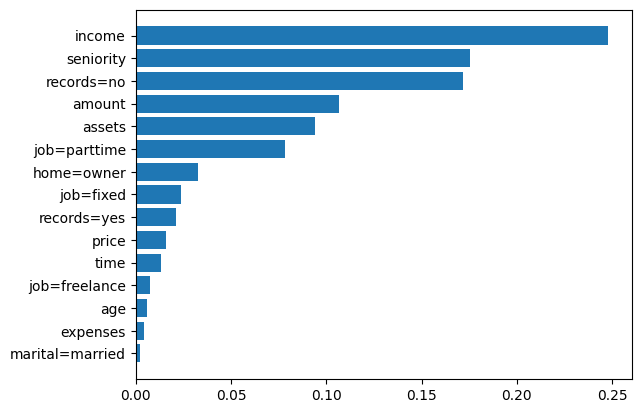

In [215]:
num = len(df_importance)
plt.barh(range(num), df_importance.gain[::-1])
plt.yticks(range(num), df_importance.feature[::-1])

plt.show()

## Random forest

In [216]:
rf.feature_importances_

array([5.69725029e-02, 8.13064537e-02, 8.60488354e-02, 1.63456567e-02,
       4.08080722e-02, 0.00000000e+00, 2.61705956e-05, 5.70368984e-03,
       3.09402473e-02, 7.97719515e-03, 2.86352957e-03, 1.51067120e-02,
       1.79846144e-01, 3.09246412e-02, 8.95414884e-03, 2.50889454e-03,
       4.99837011e-02, 0.00000000e+00, 0.00000000e+00, 1.55417581e-05,
       7.64330030e-03, 2.66579732e-03, 6.21731659e-03, 4.16030426e-04,
       6.11272080e-02, 8.07959688e-02, 5.91480421e-02, 1.34343037e-01,
       3.13111625e-02])

In [217]:
importances = list(zip(dv.feature_names_, rf.feature_importances_))

df_importance = pd.DataFrame(importances, columns=['feature', 'gain'])
df_importance = df_importance.sort_values(by='gain', ascending=False)
df_importance

,feature,gain
12,income,0.179846
27,seniority,0.134343
2,assets,0.086049
1,amount,0.081306
25,records=no,0.080796
24,price,0.061127
26,records=yes,0.059148
0,age,0.056973
16,job=parttime,0.049984
4,expenses,0.040808


In [218]:
df_importance = df_importance[df_importance.gain > 0.01]

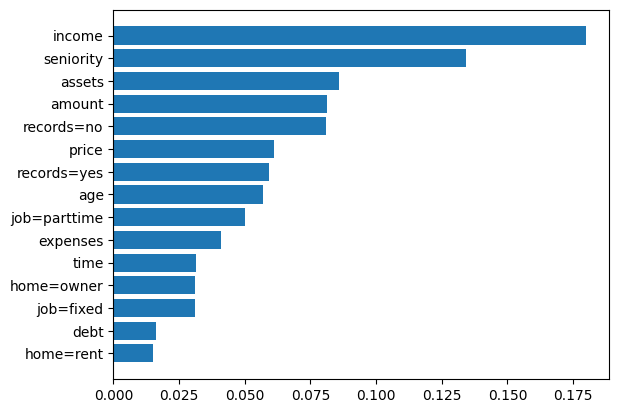

In [219]:
num = len(df_importance)
plt.barh(range(num), df_importance.gain[::-1])
plt.yticks(range(num), df_importance.feature[::-1])

plt.show()

## XGBoost

In [220]:
scores = model.get_score(importance_type='gain')
scores = sorted(scores.items(), key=lambda x: x[1])
list(reversed(scores))

[('records=no', 18.882816314697266),
 ('job=parttime', 13.273468971252441),
 ('seniority', 11.58960247039795),
 ('income', 10.448962211608887),
 ('home=owner', 9.936171531677246),
 ('job=fixed', 7.511733531951904),
 ('assets', 7.188706398010254),
 ('time', 5.927493572235107),
 ('amount', 5.1864094734191895),
 ('home=rent', 5.035571575164795),
 ('home=parents', 4.995206832885742),
 ('debt', 4.253213405609131),
 ('expenses', 4.225225448608398),
 ('job=freelance', 3.410094738006592),
 ('price', 2.838029146194458),
 ('marital=separated', 2.8036768436431885),
 ('marital=widom', 2.651329517364502),
 ('age', 2.5255839824676514),
 ('home=other', 2.5215518474578857),
 ('job=others', 2.428941488265991),
 ('home=private', 2.278200626373291),
 ('marital=married', 1.5635093450546265)]

In [221]:
scores = model.get_score(importance_type='weight')
scores = sorted(scores.items(), key=lambda x: x[1])
list(reversed(scores))

[('price', 173.0),
 ('amount', 168.0),
 ('income', 150.0),
 ('seniority', 120.0),
 ('assets', 105.0),
 ('age', 101.0),
 ('expenses', 76.0),
 ('records=no', 54.0),
 ('debt', 53.0),
 ('time', 35.0),
 ('job=parttime', 30.0),
 ('marital=separated', 25.0),
 ('home=owner', 14.0),
 ('job=fixed', 12.0),
 ('home=private', 12.0),
 ('home=parents', 11.0),
 ('home=rent', 10.0),
 ('job=freelance', 7.0),
 ('marital=married', 6.0),
 ('marital=widom', 5.0),
 ('home=other', 5.0),
 ('job=others', 2.0)]

In [222]:
names = [n for (n, s) in scores]
scores = [s for (n, s) in scores]

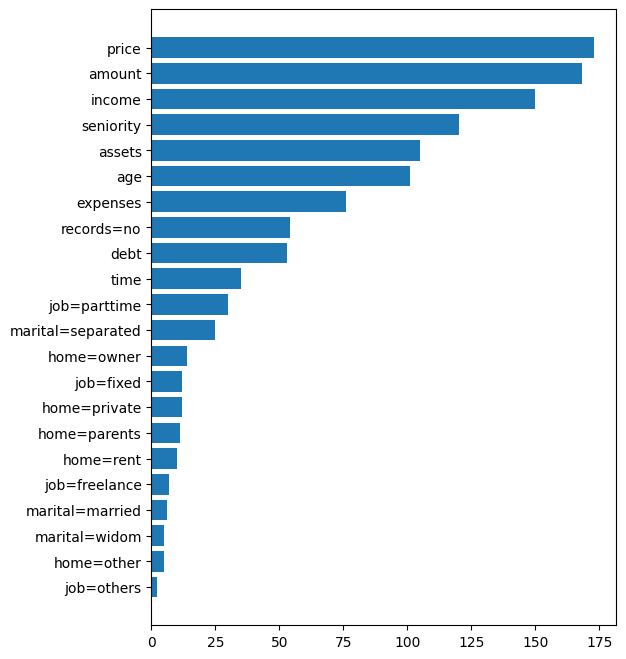

In [223]:
plt.figure(figsize=(6, 8))

plt.barh(np.arange(len(scores)), scores)
plt.yticks(np.arange(len(names)), names)

plt.show()

## Bonus: Extremely randomized trees

In [224]:
from sklearn.ensemble import ExtraTreesClassifier

In [225]:
aucs = []

for i in range(10, 201, 10):
    rf = ExtraTreesClassifier(n_estimators=i, max_depth=30)
    rf.fit(X_train, y_train)
    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    print('%s -> %.3f' % (i, auc))
    aucs.append(auc)

10 -> 0.756
20 -> 0.774
30 -> 0.779
40 -> 0.791
50 -> 0.785
60 -> 0.788
70 -> 0.797
80 -> 0.794
90 -> 0.797
100 -> 0.790
110 -> 0.789
120 -> 0.798
130 -> 0.795
140 -> 0.799
150 -> 0.796
160 -> 0.799
170 -> 0.795
180 -> 0.796
190 -> 0.797
200 -> 0.797
